# Environment Setup


In [41]:
import numpy as np 

import pandas as pd 

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score 

from sklearn.datasets import load_iris

import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt

### Loading the Iris dataset


In [8]:
dataset = load_iris()

In [11]:
def dataset_to_pandas():
    #put the dataset into a pandas DF using the feature names as columnsç
    #rename the column name so the dont include the '(cm)'
    #add 2 columns one with the target and another with the target_names
    
    # YOUR CODE HERE
    col = dataset.feature_names
    features = []
    for i in col:
        features.append(i.replace("(cm)",'').strip())
    features
    df = pd.DataFrame(dataset.data,columns=features)
    df['target'] = dataset.target
    df['class'] = dataset.target_names[dataset.target]
    return df
    #return df
    raise NotImplementedError()
df =dataset_to_pandas()

In [17]:
X = df.values[:,0:4]
Y = df.target


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Decision tree


In [35]:
clf = tree.DecisionTreeClassifier()

In [36]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
Y_pred_clf=clf.predict(X_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 0.9666666666666667


[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.523076

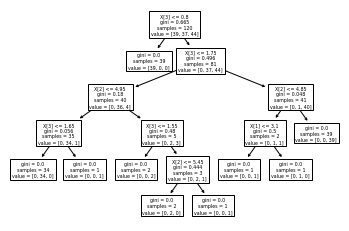

In [43]:

tree.plot_tree(clf) 

In [21]:
RF = RandomForestClassifier(random_state=0)

In [23]:
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [24]:
Y_pred=RF.predict(X_test)

Y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))


Accuracy: 1.0


In [27]:
RF.predict([[3, 5, 4, 2]])

array([1])

In [29]:
accuracy_list = []
criterion = ['gini', 'entropy']
for i in range(1,50):
    for crit in criterion:
        RF = RandomForestClassifier(n_estimators=i,criterion=crit, random_state=0)
        RF.fit(X_train,y_train)
        Y_pred=RF.predict(X_test)
        accuracy_list.append([i, metrics.accuracy_score(y_test, Y_pred), crit])
    
   
print(accuracy_list)
accuracy_array = np.array(accuracy_list)

[[1, 0.9666666666666667, 'gini'], [1, 0.9666666666666667, 'entropy'], [2, 0.9666666666666667, 'gini'], [2, 0.9666666666666667, 'entropy'], [3, 0.9666666666666667, 'gini'], [3, 0.9666666666666667, 'entropy'], [4, 0.9666666666666667, 'gini'], [4, 0.9333333333333333, 'entropy'], [5, 0.9666666666666667, 'gini'], [5, 0.9666666666666667, 'entropy'], [6, 0.9666666666666667, 'gini'], [6, 0.9666666666666667, 'entropy'], [7, 0.9666666666666667, 'gini'], [7, 0.9666666666666667, 'entropy'], [8, 0.9666666666666667, 'gini'], [8, 0.9666666666666667, 'entropy'], [9, 0.9666666666666667, 'gini'], [9, 0.9666666666666667, 'entropy'], [10, 0.9666666666666667, 'gini'], [10, 0.9666666666666667, 'entropy'], [11, 0.9666666666666667, 'gini'], [11, 1.0, 'entropy'], [12, 0.9666666666666667, 'gini'], [12, 1.0, 'entropy'], [13, 0.9666666666666667, 'gini'], [13, 1.0, 'entropy'], [14, 0.9666666666666667, 'gini'], [14, 1.0, 'entropy'], [15, 1.0, 'gini'], [15, 1.0, 'entropy'], [16, 1.0, 'gini'], [16, 1.0, 'entropy'], [

In [30]:
df_accuracy = pd.DataFrame(accuracy_array, columns =[ "model","accuracy","criterion"])

In [31]:
df_accuracy

,model,accuracy,criterion
0,1,0.9666666666666667,gini
1,1,0.9666666666666667,entropy
2,2,0.9666666666666667,gini
3,2,0.9666666666666667,entropy
4,3,0.9666666666666667,gini
...,...,...,...
93,47,0.9666666666666667,entropy
94,48,0.9666666666666667,gini
95,48,0.9666666666666667,entropy
96,49,0.9666666666666667,gini


In [32]:
 df_accuracy.groupby(["criterion"]).apply(display)

   model            accuracy criterion
1      1  0.9666666666666667   entropy
3      2  0.9666666666666667   entropy
5      3  0.9666666666666667   entropy
7      4  0.9333333333333333   entropy
9      5  0.9666666666666667   entropy
11     6  0.9666666666666667   entropy
13     7  0.9666666666666667   entropy
15     8  0.9666666666666667   entropy
17     9  0.9666666666666667   entropy
19    10  0.9666666666666667   entropy
21    11                 1.0   entropy
23    12                 1.0   entropy
25    13                 1.0   entropy
27    14                 1.0   entropy
29    15                 1.0   entropy
31    16                 1.0   entropy
33    17                 1.0   entropy
35    18                 1.0   entropy
37    19                 1.0   entropy
39    20                 1.0   entropy
41    21                 1.0   entropy
43    22                 1.0   entropy
45    23                 1.0   entropy
47    24  0.9666666666666667   entropy
49    25  0.9666666666666

""
